In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 7.0 MB/s eta 0:00:00


In [2]:
import osmnx as ox

place = "Kamppi, Helsinki, Finland"
gdf = ox.geocoder.geocode_to_gdf(place)

<Axes: >

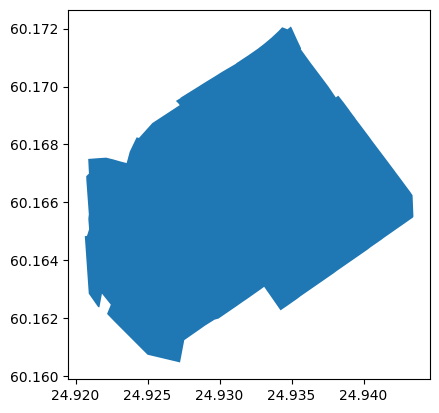

In [3]:
gdf.plot()

In [4]:
!pip install folium matplotlib mapclassify
gdf.explore()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00


In [9]:
kamppi_polygon = gdf.geometry.iloc[0]

In [11]:
buildings_gdf = ox.features_from_polygon(
    kamppi_polygon,
    tags = {"building": True, "highway": True, "railway": "station", "station": "subway"}
)

In [12]:
streets_graph = ox.graph_from_polygon(kamppi_polygon, network_type="all")
streets_gdf = ox.graph_to_gdfs(streets_graph, nodes=True)

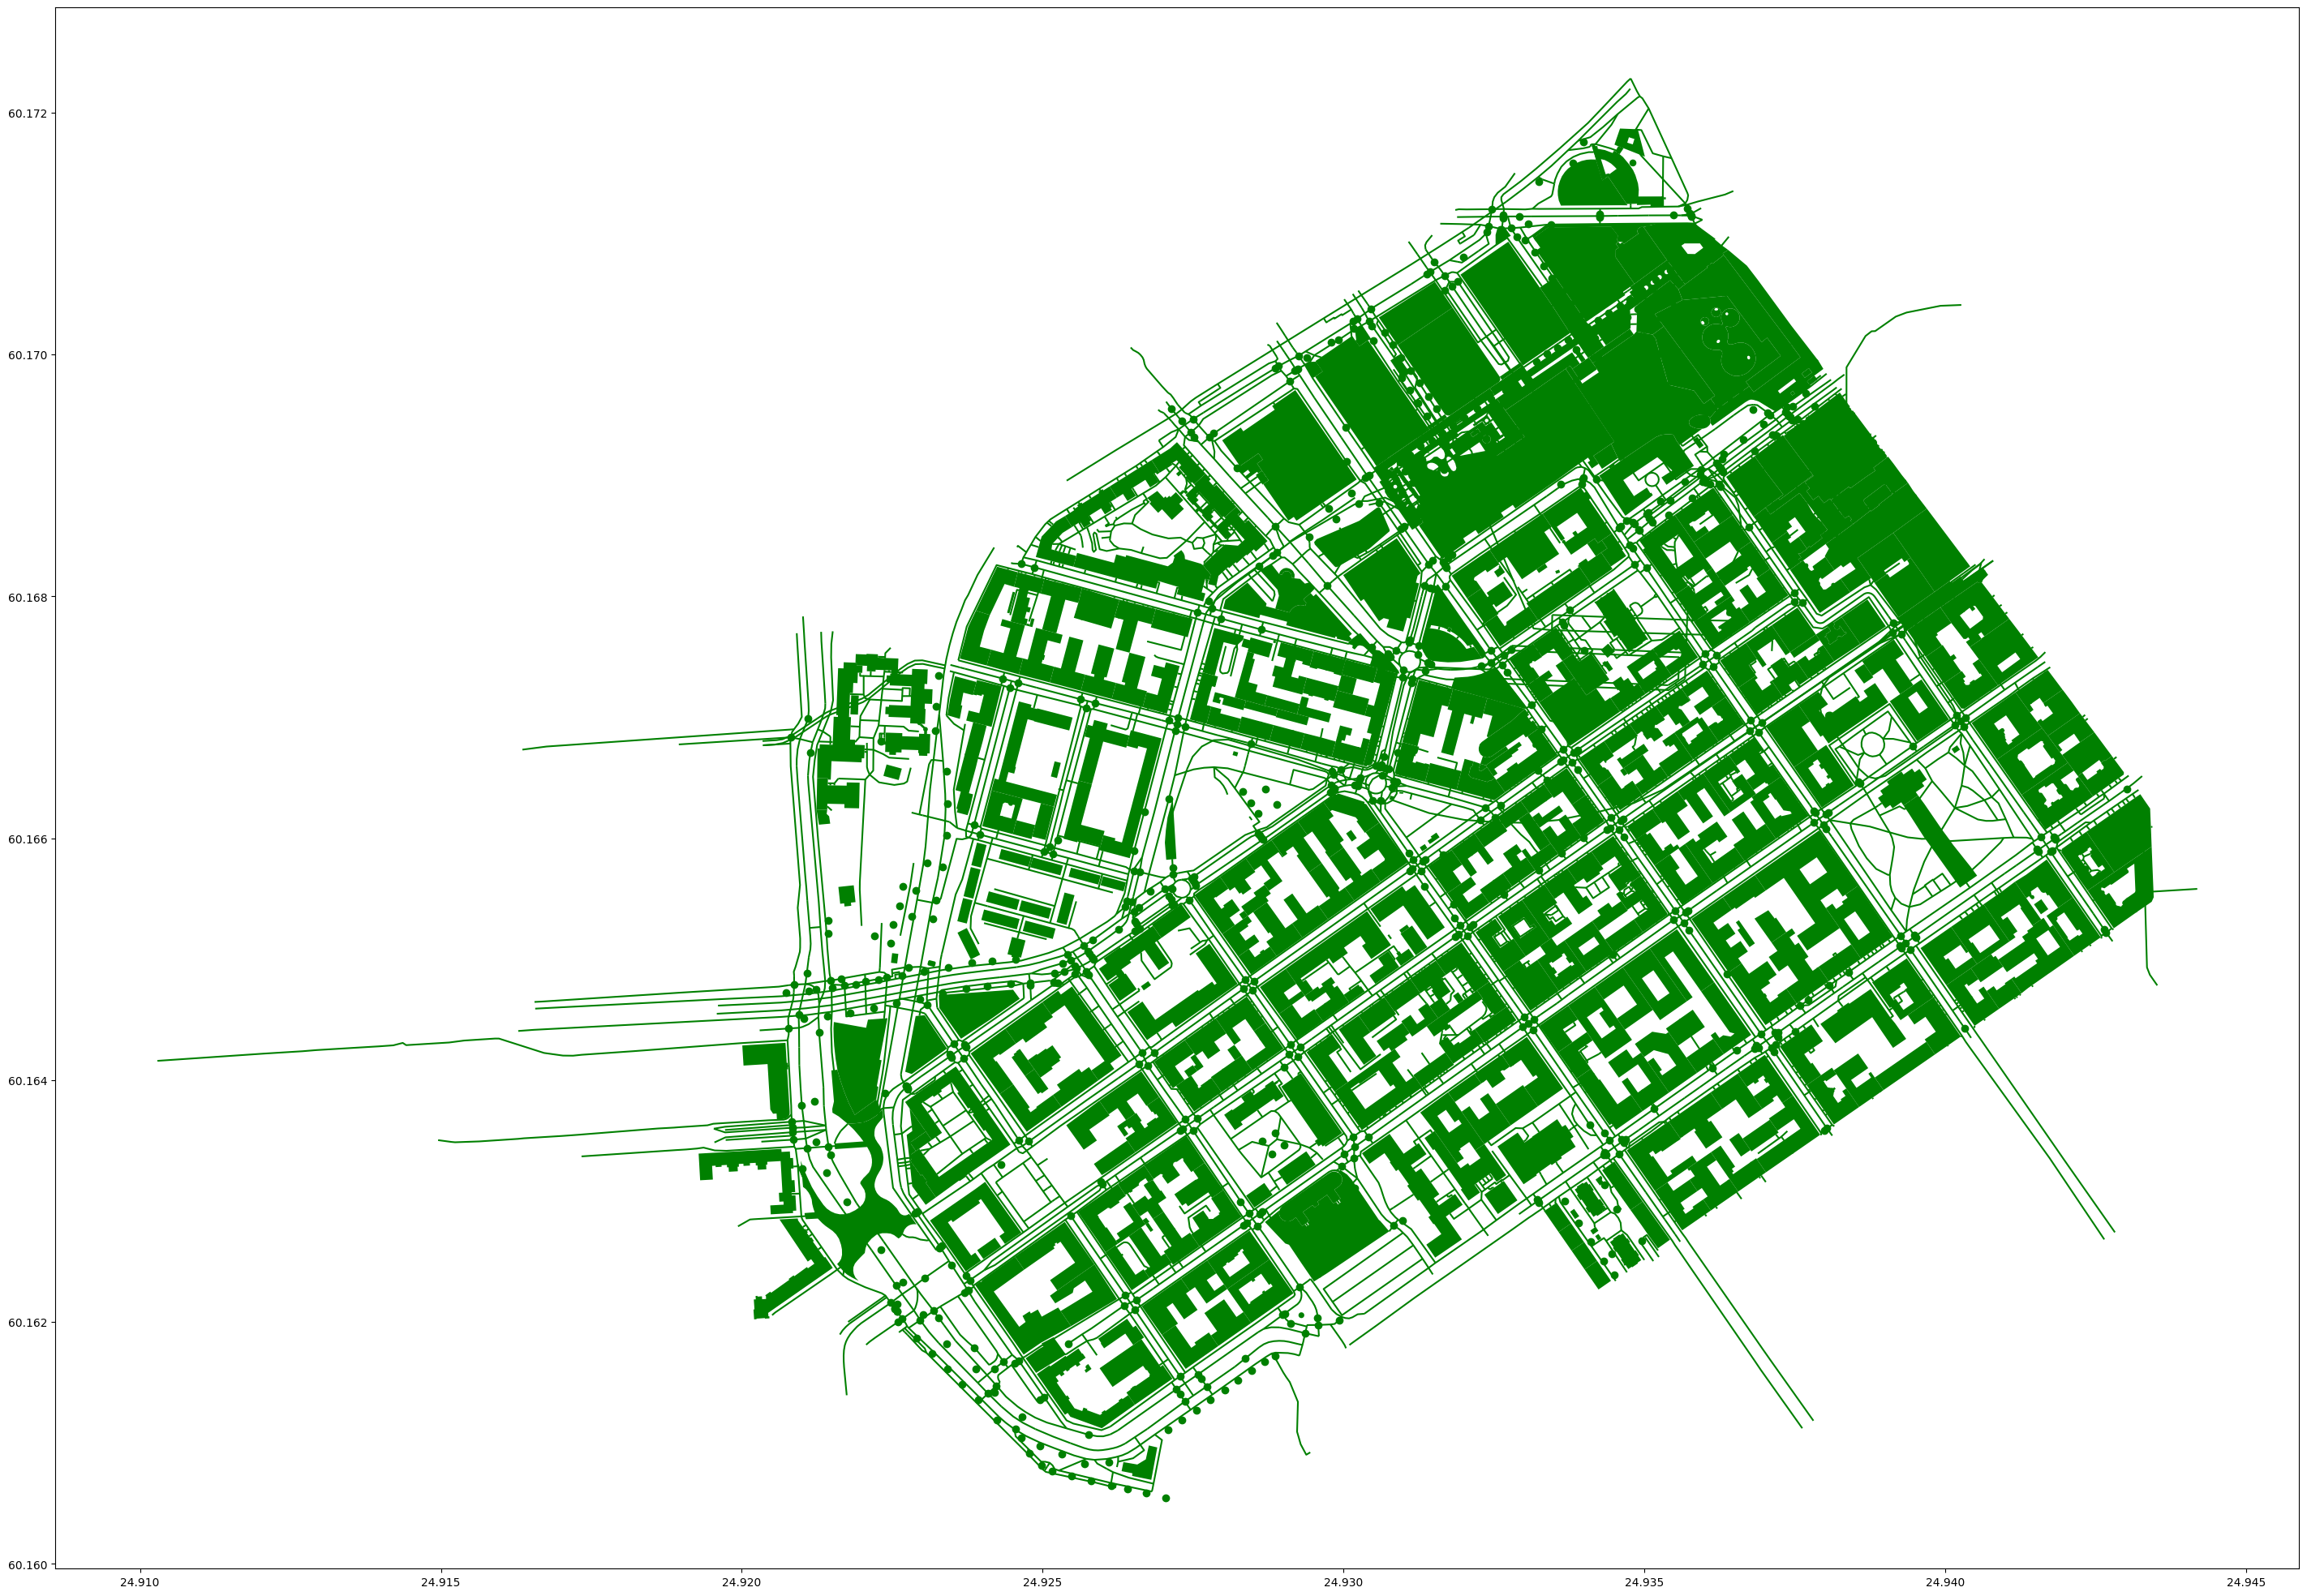

In [13]:
ax = buildings_gdf.plot(figsize=(40, 25), color="green")

In [ ]:
au = buildings_gdf.explore(figsize=(40, 25), color="green")

In [17]:
!pip install contextily
!pip install geodatasets

In [18]:
%matplotlib inline

import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
from geodatasets import get_path

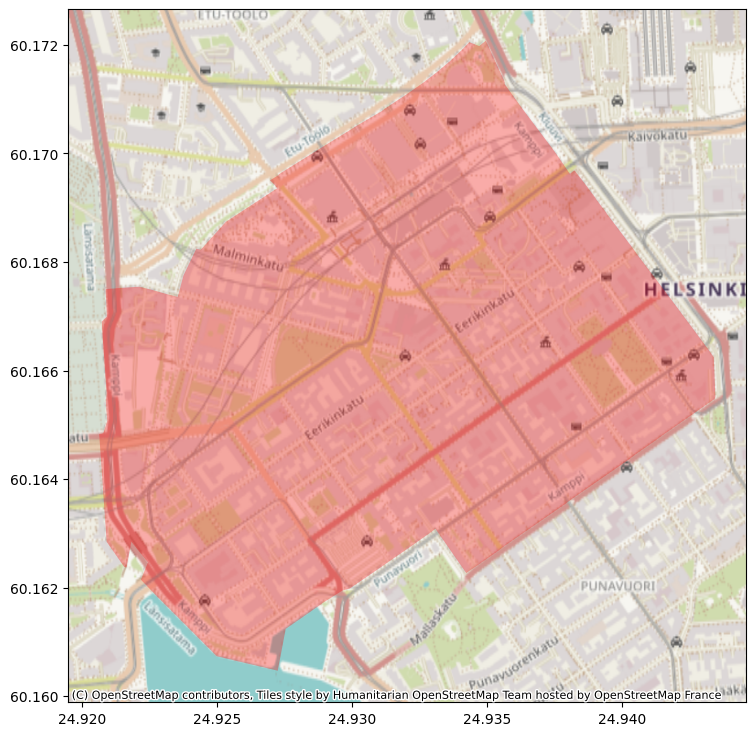

In [24]:
ax = gdf.plot(color="red", figsize=(9, 9), alpha=0.3)
cx.add_basemap(ax, crs=gdf.crs)